In [1]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
import pandas as pd
import numpy as np
from adjustText import adjust_text
import matplotlib.pylab as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
data = pd.read_csv("data_adj/fixed_counts_matrix.tsv", sep="\t")
#here is where we filter out what samples we want to use
data = data.filter(items=['gene_id',
                'LB_10.5_NA_1', 'LB_10.5_NA_2','LB_11.5_NA_1', 'LB_11.5_NA_2',
                'G_4_F_1', 'G_4_F_2','G_4_M_1', 'G_4_M_2',
                'SM_0_NA_1', 'SM_0_NA_2',
                'MB_1', 'MB_2','MB_3', 'MB_4','MB_5',
                'MT_1', 'MT_2', 'MT_3', 'MT_4', 'MT_5'])
data = data.set_index(data["gene_id"])
data = data.drop('gene_id', axis=1)

In [3]:
data.head()

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,G_4_F_1,G_4_F_2,G_4_M_1,G_4_M_2,SM_0_NA_1,SM_0_NA_2,MB_1,MB_2,MB_3,MB_4,MB_5,MT_1,MT_2,MT_3,MT_4,MT_5
gene_id,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000099183.1,0,0,0,0,2,4,1,8,1,4,12,4,0,0,1,12,19,6,2,4
ENSMUSG00000065559.1,96,350,1561,1909,720323,517475,652657,101,298316,447669,70786,15451,27143,24389,27329,2584038,4111798,1074677,1300194,1256891
ENSMUSG00000065480.1,4,25,92,83,444,373,427,10,2556,4440,2433,306,334,359,1088,103180,104254,26475,26033,21244
ENSMUSG00000065405.3,18023,20008,13458,15665,26029,16861,16800,17258,17696,20188,223146,132440,125913,135138,120392,46398,64996,27729,28878,25335
ENSMUSG00000065567.1,125,57,111,71,213,240,186,1986,51,87,5289,1440,2074,1710,2018,535,812,517,529,416


In [4]:
metadata = pd.read_csv("data_adj/metadata.tsv", sep="\t",
                      usecols=["File.accession", "Biosample.term.name", "Age", "Sample"])

In [5]:
# Filter metadata DataFrame based on matching samples in merged_df
metadata_filtered = metadata[metadata['Sample'].isin(data.columns)].copy()

# Sort filtered_metadata based on the order of columns in merged_df
metadata_filtered['Sample'] = pd.Categorical(metadata_filtered['Sample'], categories=data.columns)
metadata_filtered.sort_values('Sample', inplace=True)

In [6]:
filtering = {'Biosample.term.name': ['C2C12', 'limb'],#whatever you need from the biosample names
             'Age': ["ED_10.5","ED_11.5","0"]}
group = 'Biosample.term.name' # change to the group you're interested in making the comparison in

In [7]:
metadata_selected = metadata_filtered.copy(deep=True)

In [8]:
for col in filtering.keys():
    metadata_selected = metadata_selected[metadata_selected[col].isin(filtering[col])]

In [9]:
metadata_selected

,File.accession,Biosample.term.name,Age,Sample
33,ENCFF398EBM,limb,ED_10.5,LB_10.5_NA_1
34,ENCFF065GME,limb,ED_10.5,LB_10.5_NA_2
35,ENCFF336AYD,limb,ED_11.5,LB_11.5_NA_1
36,ENCFF116YCG,limb,ED_11.5,LB_11.5_NA_2
0,ENCFF784UWQ,C2C12,0,MB_1
1,ENCFF094EFP,C2C12,0,MB_2
51,Ctrl_0hr_A_new,C2C12,0,MB_3
52,Ctrl_0hr_B_new,C2C12,0,MB_4
53,Ctrl_0hr_C_new,C2C12,0,MB_5


In [10]:
metadata_selected.index = metadata_selected['Sample']
data_selected = data.loc[:, metadata_selected['Sample']]

In [11]:
data_selected

,LB_10.5_NA_1,LB_10.5_NA_2,LB_11.5_NA_1,LB_11.5_NA_2,MB_1,MB_2,MB_3,MB_4,MB_5
gene_id,,,,,,,,,
ENSMUSG00000099183.1,0,0,0,0,12,4,0,0,1
ENSMUSG00000065559.1,96,350,1561,1909,70786,15451,27143,24389,27329
ENSMUSG00000065480.1,4,25,92,83,2433,306,334,359,1088
ENSMUSG00000065405.3,18023,20008,13458,15665,223146,132440,125913,135138,120392
ENSMUSG00000065567.1,125,57,111,71,5289,1440,2074,1710,2018
...,...,...,...,...,...,...,...,...,...
ENSMUSG00000099172.1,0,0,0,0,0,0,0,0,0
ENSMUSG00000093219.1,2,0,1,0,13,3,1,1,0
ENSMUSG00000065602.1,210,251,368,354,57897,15115,4542,5196,4304


In [12]:
metadata_selected

,File.accession,Biosample.term.name,Age,Sample
Sample,,,,
LB_10.5_NA_1,ENCFF398EBM,limb,ED_10.5,LB_10.5_NA_1
LB_10.5_NA_2,ENCFF065GME,limb,ED_10.5,LB_10.5_NA_2
LB_11.5_NA_1,ENCFF336AYD,limb,ED_11.5,LB_11.5_NA_1
LB_11.5_NA_2,ENCFF116YCG,limb,ED_11.5,LB_11.5_NA_2
MB_1,ENCFF784UWQ,C2C12,0,MB_1
MB_2,ENCFF094EFP,C2C12,0,MB_2
MB_3,Ctrl_0hr_A_new,C2C12,0,MB_3
MB_4,Ctrl_0hr_B_new,C2C12,0,MB_4
MB_5,Ctrl_0hr_C_new,C2C12,0,MB_5


In [13]:
dds = DeseqDataSet(
    counts=data_selected.T,
    clinical=metadata_selected,
    design_factors=group,
    refit_cooks=True)

dds.deseq2()
stat_res = DeseqStats(dds, 
                      contrast=[group] + filtering[group])
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.



/opt/apps/python/3.8.0/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Fitting dispersions...
... done in 5.57 seconds.

Fitting dispersion trend curve...
... done in 1.01 seconds.

Fitting MAP dispersions...
... done in 4.62 seconds.

Fitting LFCs...
... done in 1.76 seconds.

Refitting 0 outliers.

Running Wald tests...
... done in 1.04 seconds.

Log2 fold change & Wald test p-value: Biosample.term.name C2C12 vs limb


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene_id,,,,,,
ENSMUSG00000099183.1,0.728593,2.536942,2.318363,1.094281,2.738316e-01,3.668049e-01
ENSMUSG00000065559.1,13541.020508,4.194490,0.754771,5.557305,2.739725e-08,1.324757e-07
ENSMUSG00000065480.1,346.381165,3.080058,0.808653,3.808875,1.396004e-04,4.593491e-04
ENSMUSG00000065405.3,73963.484375,2.391192,0.351179,6.809037,9.825391e-12,5.993488e-11
ENSMUSG00000065567.1,1033.002808,3.890712,0.413063,9.419168,4.546743e-21,4.451317e-20
...,...,...,...,...,...,...
ENSMUSG00000099172.1,0.000000,NaN,NaN,NaN,NaN,NaN
ENSMUSG00000093219.1,1.212682,0.711722,1.264641,0.562785,5.735811e-01,6.601594e-01
ENSMUSG00000065602.1,4490.015137,4.321477,0.394614,10.951140,6.561644e-28,8.971352e-27


In [14]:
l2fc_cutoff = 2 # Log 2 fold change; usually 0.5 - 2
pval_cutoff = 0.05 # 0.01 is even better than 0.05

In [15]:
annot = pd.read_csv("data_adj/mirna_id_to_name.tsv", sep="\t")
annot.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
annot.head()

,gene_id,gene_name
0,ENSMUSG00000065559.1,Mir206
1,ENSMUSG00000065480.1,Mir133b
2,ENSMUSG00000065567.1,Mir30c-2
3,ENSMUSG00000105982.1,Mir6896
4,ENSMUSG00000092852.1,Mir5103


In [17]:
df = stat_res.results_df.copy(deep=True)

In [18]:
# Find the machine-specific lowest non-zero value
lowest_nonzero_value = df['padj'][df['padj'] > 0].min()

# Replace 0 with the lowest non-zero value
df['padj'] = np.where(df['padj'] == 0, lowest_nonzero_value, df['padj'])

df = df.dropna()
df = df.merge(annot, left_index=True, right_on='gene_id')
df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_id,gene_name
0,13541.020508,4.194490,0.754771,5.557305,2.739725e-08,1.324757e-07,ENSMUSG00000065559.1,Mir206
1,346.381165,3.080058,0.808653,3.808875,1.396004e-04,4.593491e-04,ENSMUSG00000065480.1,Mir133b
818,73963.484375,2.391192,0.351179,6.809037,9.825391e-12,5.993488e-11,ENSMUSG00000065405.3,Mir30a
2,1033.002808,3.890712,0.413063,9.419168,4.546743e-21,4.451317e-20,ENSMUSG00000065567.1,Mir30c-2
3,3.141078,3.812669,1.462249,2.607400,9.123272e-03,2.127869e-02,ENSMUSG00000105982.1,Mir6896
...,...,...,...,...,...,...,...,...
810,10.742262,-6.209863,1.092043,-5.686464,1.296966e-08,6.468514e-08,ENSMUSG00000080331.1,Mir1298
811,1.938560,-4.965303,2.054254,-2.417083,1.564544e-02,3.417860e-02,ENSMUSG00000065450.1,Mir448
813,1.212682,0.711722,1.264641,0.562785,5.735811e-01,6.601594e-01,ENSMUSG00000093219.1,Mir3113
814,4490.015137,4.321477,0.394614,10.951140,6.561644e-28,8.971352e-27,ENSMUSG00000065602.1,Mirlet7f-2


In [19]:
# Calculate -log10(padj)
df['nlog10padj'] = -np.log10(df['padj'])

# Add labels to DE column based on our cutoffs above
df['DE'] = "No"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"

/tmp/ipykernel_2231232/1959988433.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange > l2fc_cutoff)] = "Up"
/tmp/ipykernel_2231232/1959988433.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DE[np.logical_and(df.padj < pval_cutoff, df.log2FoldChange < -l2fc_cutoff)] = "Down"


In [20]:
df.to_csv("data_adj/deg_quantity/MB_ED_early.tsv", sep="\t", columns=["gene_name", "DE"])

/tmp/ipykernel_2228306/3616776888.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.label[df.DE == "No"] = ""
/tmp/ipykernel_2228306/3616776888.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  down.sort_values(["padj"], inplace=True)
/tmp/ipykernel_2228306/3616776888.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up.sort_values(["padj"], inplace=True)


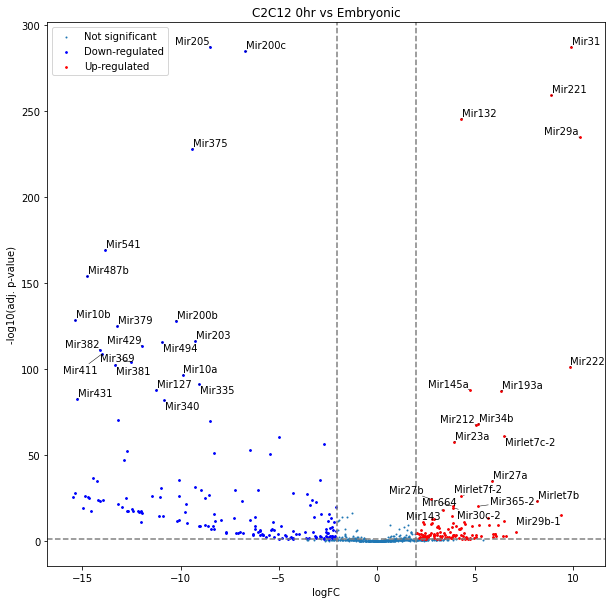

In [21]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

df['label'] = df.gene_name
df.label[df.DE == "No"] = ""

# Create the figure
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(10, 10)

# Plot whole df first (with small size dots)
ax.scatter(x=df['log2FoldChange'], y=df['nlog10padj'], s=1, label="Not significant")

# Highlight up- or down-regulated genes
down = df[df.DE == "Down"]
down.sort_values(["padj"], inplace=True)
up = df[df.DE == "Up"]
up.sort_values(["padj"], inplace=True)

# Overlay up- and down-regulated gene dfs with larger label and specific color
ax.scatter(x=down['log2FoldChange'], y=down['nlog10padj'], s=3, label="Down-regulated", color="blue")
ax.scatter(x=up['log2FoldChange'], y=up['nlog10padj'], s=3, label="Up-regulated", color="red")

# Display names of top 20 up- or down-regulated genes
n_genes = 20
texts = []
for i in range(min(n_genes, up.shape[0])):
    texts.append(ax.text(x=up.iloc[i, 1],
                         y=up.iloc[i, 8],
                         s=up.iloc[i, 7]))
for i in range(min(n_genes, down.shape[0])):
    texts.append(ax.text(x=down.iloc[i, 1],
                         y=down.iloc[i, 8],
                         s=down.iloc[i, 7]))
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

# Draw lines indicating lfc and padj cutoffs
ax.set_xlabel("logFC")
ax.set_ylabel("-log10(adj. p-value)")
ax.axvline(l2fc_cutoff, color="grey", linestyle="--")
ax.axvline(-l2fc_cutoff, color="grey", linestyle="--")
ax.axhline(-np.log10(pval_cutoff), color="grey", linestyle="--")

# Draw legend
ax.legend()

# Add a title to the plot
ax.set_title("C2C12 0hr vs Embryonic")
#ax.set_title("Skeletal Muscle Embryonic vs PND0")

# Save the plot as a high-resolution PNG with specific width and height
output_file = "plots/volcano_MB.png"
#output_file = "plots/volcano_skeletal.png"
plt.savefig(output_file, dpi=300)

# Show the plot
plt.show()